In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
# Read data directly from the CSV file
df = pd.read_csv('custom_pipeline.csv', header=None)

# Rename columns based on the structure in your data
df.columns = ['chunk_size', 'overlap', 'mode', 'model', 'database', 'llm', 'time', 'unknown_metric', 'memory']

# Filter out rows with very small processing times (likely errors or null runs)
df_filtered = df[df['time'] > 10]

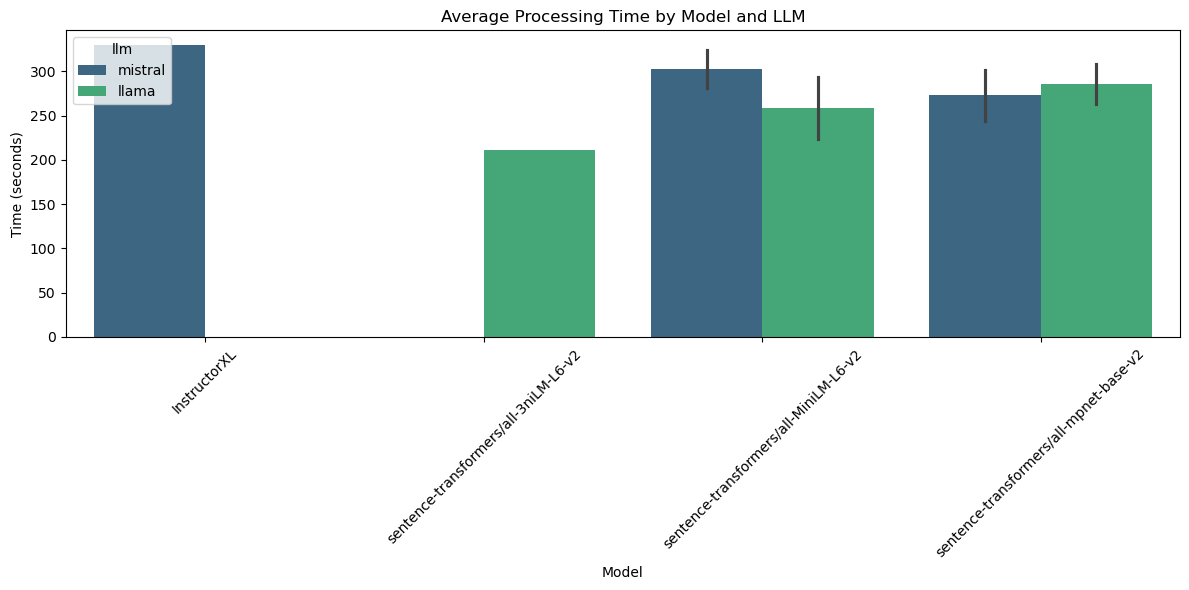

In [4]:
# 1. Model & LLM Comparison (Bar Chart)
plt.figure(figsize=(12, 6))
model_llm_time = df_filtered.groupby(['model', 'llm', 'database'])['time'].mean().reset_index()

sns.barplot(x='model', y='time', hue='llm', data=model_llm_time, palette='viridis')
plt.title('Average Processing Time by Model and LLM')
plt.xlabel('Model')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.tight_layout()

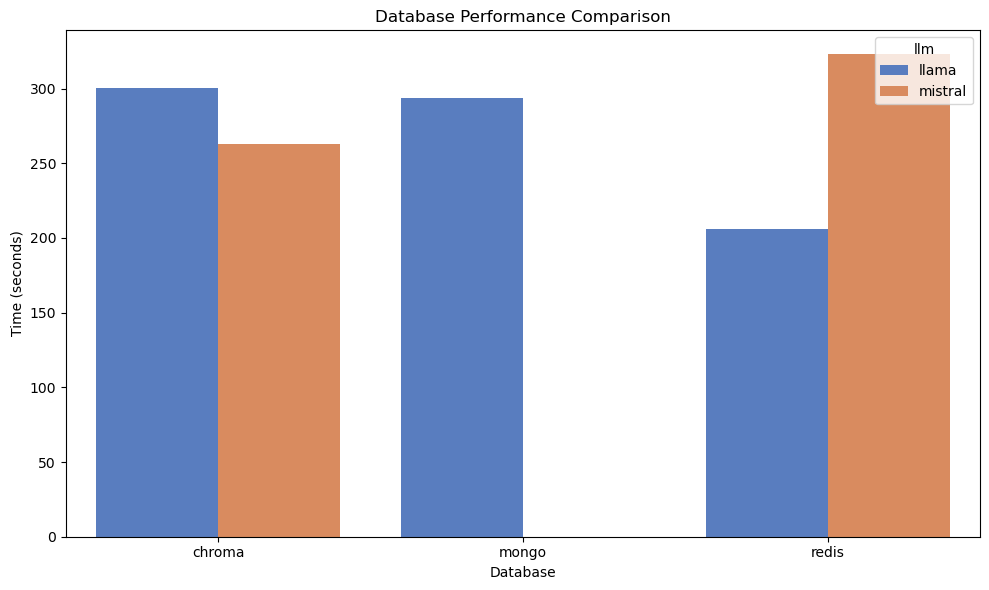

In [5]:
# 2. Database Performance Comparison
plt.figure(figsize=(10, 6))
db_perf = df_filtered[df_filtered['database'] != ''].groupby(['database', 'llm'])['time'].mean().reset_index()
sns.barplot(x='database', y='time', hue='llm', data=db_perf, palette='muted')
plt.title('Database Performance Comparison')
plt.xlabel('Database')
plt.ylabel('Time (seconds)')
plt.tight_layout()

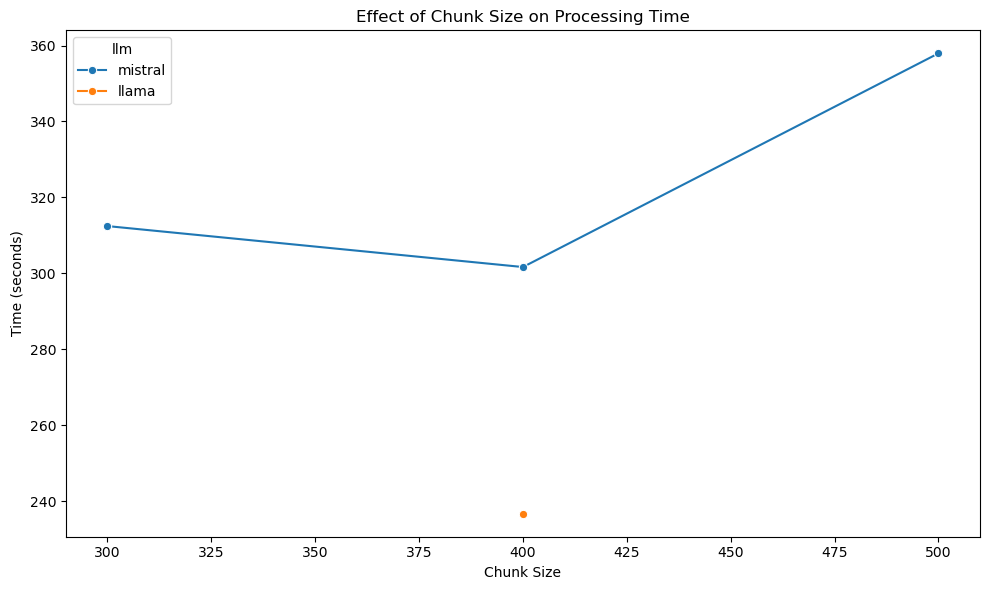

In [6]:
# 3. Chunk Size vs Processing Time
plt.figure(figsize=(10, 6))
chunk_time = df_filtered.groupby(['chunk_size', 'llm'])['time'].mean().reset_index()
sns.lineplot(x='chunk_size', y='time', hue='llm', data=chunk_time, marker='o')
plt.title('Effect of Chunk Size on Processing Time')
plt.xlabel('Chunk Size')
plt.ylabel('Time (seconds)')
plt.tight_layout()

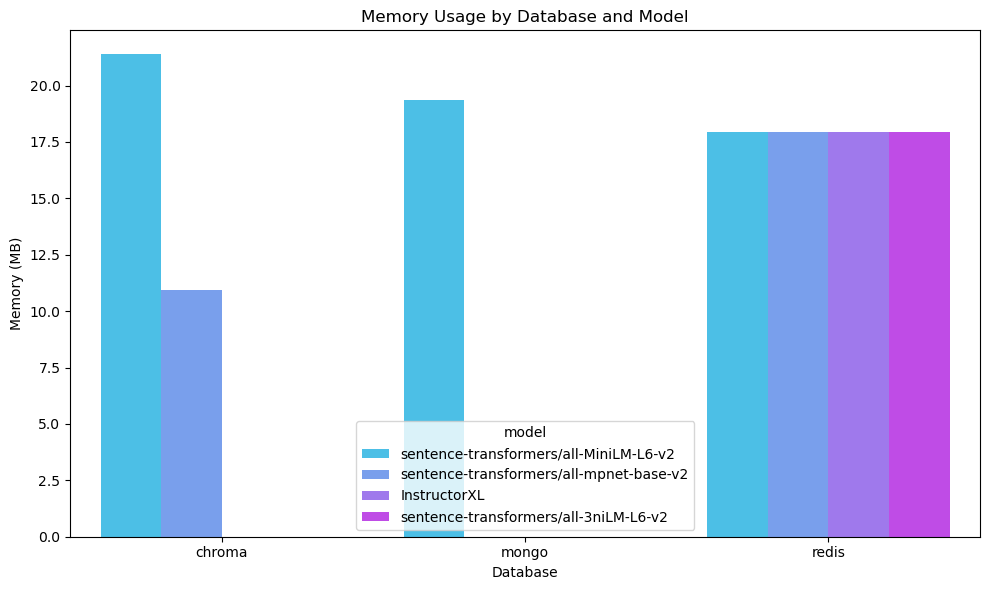

In [7]:
# 4. Memory Usage Comparison
plt.figure(figsize=(10, 6))
memory_usage = df_filtered.groupby(['database', 'model'])['memory'].mean().reset_index()
memory_usage = memory_usage[memory_usage['memory'] > 5]  # Filter out very small values
sns.barplot(x='database', y='memory', hue='model', data=memory_usage, palette='cool')
plt.title('Memory Usage by Database and Model')
plt.xlabel('Database')
plt.ylabel('Memory (MB)')
plt.tight_layout()

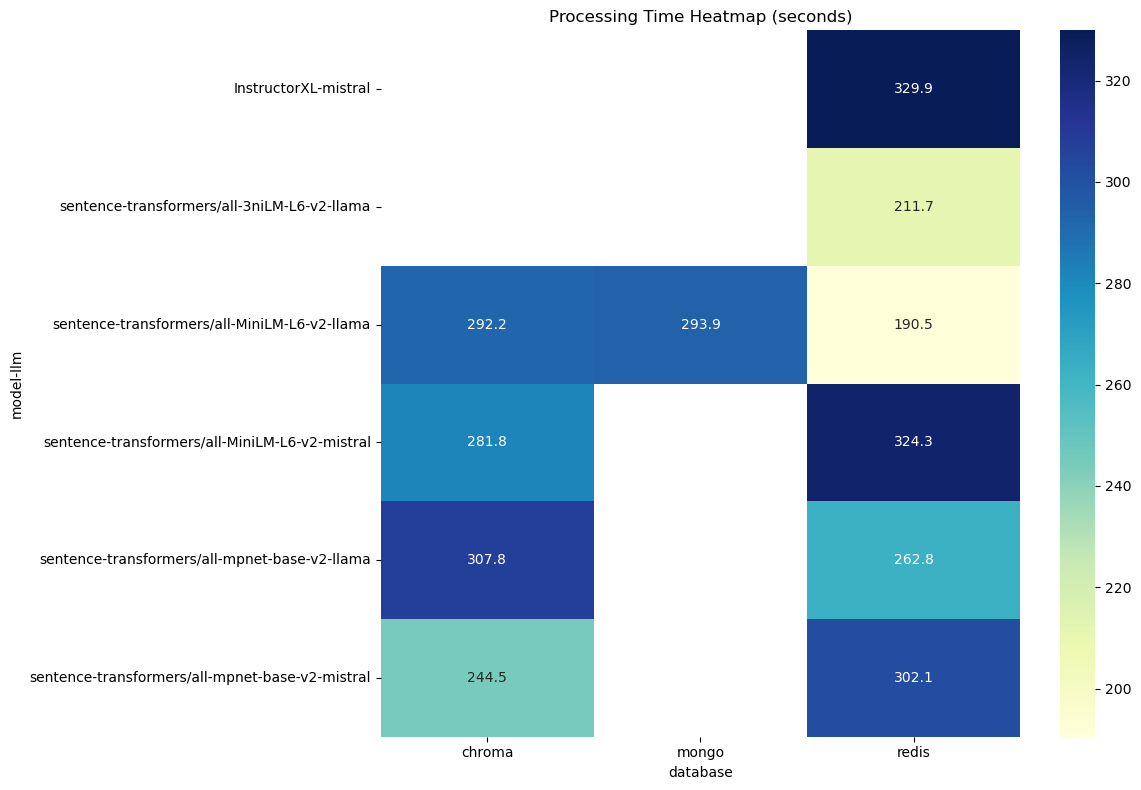

In [8]:
# 5. Heatmap: Time Performance across all configurations
plt.figure(figsize=(12, 8))
pivot_df = df_filtered.pivot_table(
    index=['model', 'llm'], 
    columns='database', 
    values='time', 
    aggfunc='mean'
)
sns.heatmap(pivot_df, annot=True, fmt='.1f', cmap='YlGnBu')
plt.title('Processing Time Heatmap (seconds)')
plt.tight_layout()

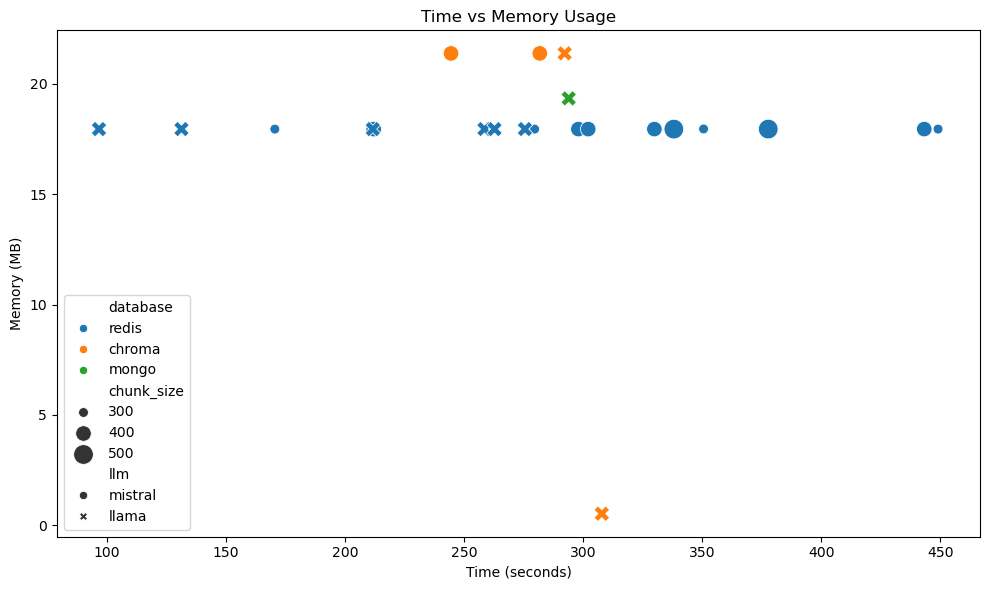

In [9]:
# 6. Scatterplot: Time vs Memory Usage
plt.figure(figsize=(10, 6))
sns.scatterplot(x='time', y='memory', hue='database', style='llm', size='chunk_size', 
                sizes=(50, 200), data=df_filtered)
plt.title('Time vs Memory Usage')
plt.xlabel('Time (seconds)')
plt.ylabel('Memory (MB)')
plt.tight_layout()

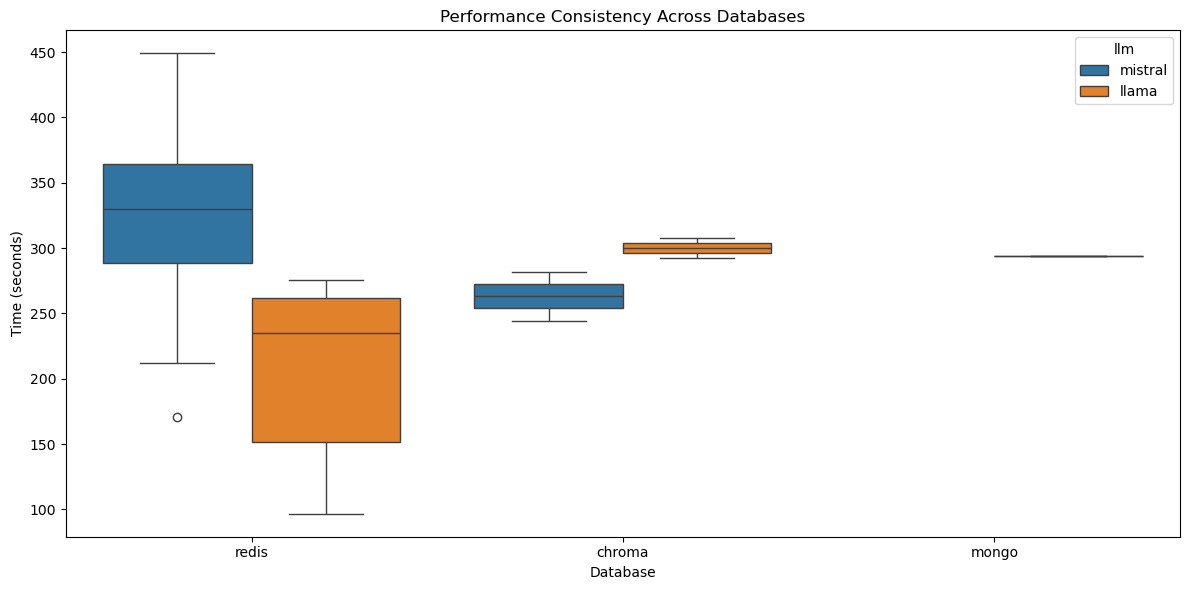

In [10]:
# 8. Box plot showing performance consistency
plt.figure(figsize=(12, 6))
sns.boxplot(x='database', y='time', hue='llm', data=df_filtered)
plt.title('Performance Consistency Across Databases')
plt.xlabel('Database')
plt.ylabel('Time (seconds)')
plt.tight_layout()